In [1]:
from pathlib import Path
import tensorflow as tf

from split import get_dataset

In [2]:
data_root = 'data/'
batch_size = 32

trainset, valset, testset = get_dataset(data_root, batch_size)

In [3]:
ResNet50_scratch = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(224,224,3))
net_scratch = tf.keras.models.Sequential()
net_scratch.add(ResNet50_scratch)
net_scratch.add(tf.keras.layers.Flatten())
net_scratch.add(tf.keras.layers.Dense(2, activation='softmax'))

net_scratch.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = net_scratch.fit(
                    trainset,
                    epochs=10,
                    validation_data=valset,
                    validation_steps=10
                    )

Epoch 1/10
195/195 [==============================] - 411s 2s/step - loss: 0.5670 - accuracy: 0.9081 - val_loss: 0.5010 - val_accuracy: 0.9250
Epoch 2/10
195/195 [==============================] - 407s 2s/step - loss: 0.4254 - accuracy: 0.9574 - val_loss: 0.7438 - val_accuracy: 0.5813
Epoch 3/10
195/195 [==============================] - 408s 2s/step - loss: 0.3288 - accuracy: 0.9709 - val_loss: 0.8683 - val_accuracy: 0.4344
Epoch 4/10
195/195 [==============================] - 409s 2s/step - loss: 0.2589 - accuracy: 0.9794 - val_loss: 0.3410 - val_accuracy: 0.9125
Epoch 5/10
195/195 [==============================] - 409s 2s/step - loss: 0.2130 - accuracy: 0.9796 - val_loss: 0.2232 - val_accuracy: 0.9656
Epoch 6/10
195/195 [==============================] - 404s 2s/step - loss: 0.1759 - accuracy: 0.9836 - val_loss: 0.1423 - val_accuracy: 0.9969
Epoch 7/10
195/195 [==============================] - 406s 2s/step - loss: 0.1388 - accuracy: 0.9907 - val_loss: 0.1507 - val_accuracy: 0.9812

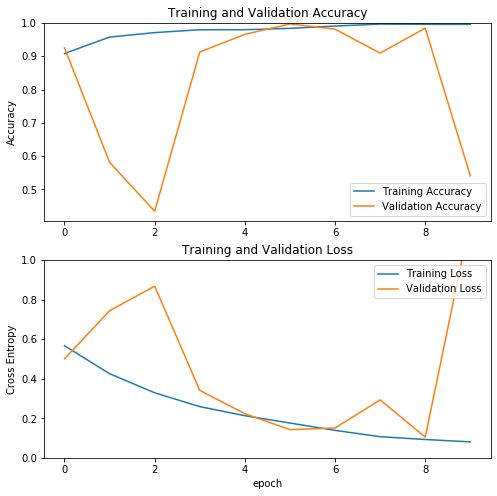

In [4]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()